In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_activity, plot_phase_coherence

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

## Instantiate a random graph and transform into an adjacency matrix


In [67]:
graph_nx = nx.erdos_renyi_graph(n=100, p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)

## Instantiate model with parameters

In [68]:
model = Kuramoto(coupling=5, dt=0.01, T=10, n_nodes=len(graph))

## Run simulation - output is time series for all nodes (node vs time)

In [69]:
act_mat = model.run(adj_mat=graph)
print(act_mat.shape)

(100, 1000)


## Plot all the time series

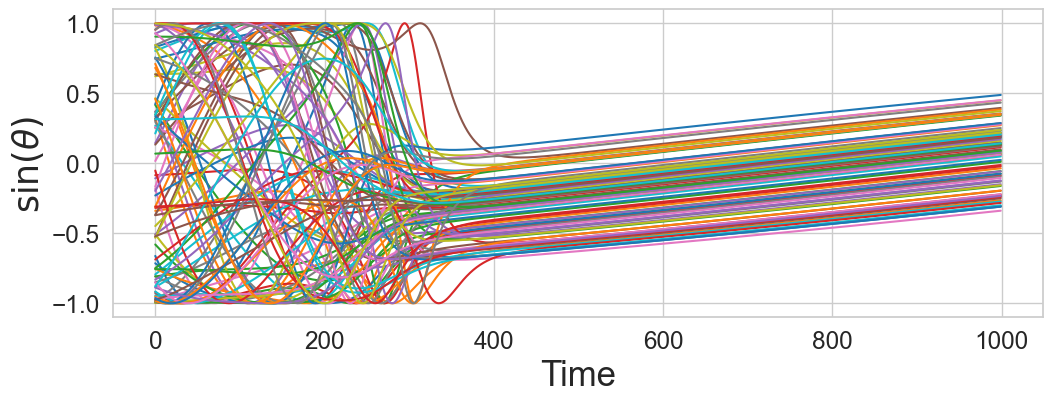

In [70]:
plot_activity(act_mat);

## Plot evolution of order global order parameter $R_t$

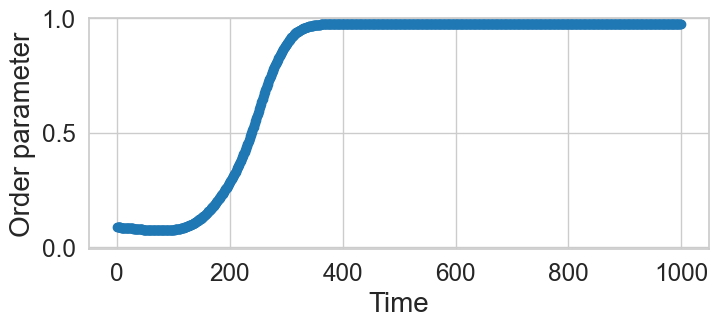

In [71]:
plot_phase_coherence(act_mat);

## Plot oscillators in complex plane at different times

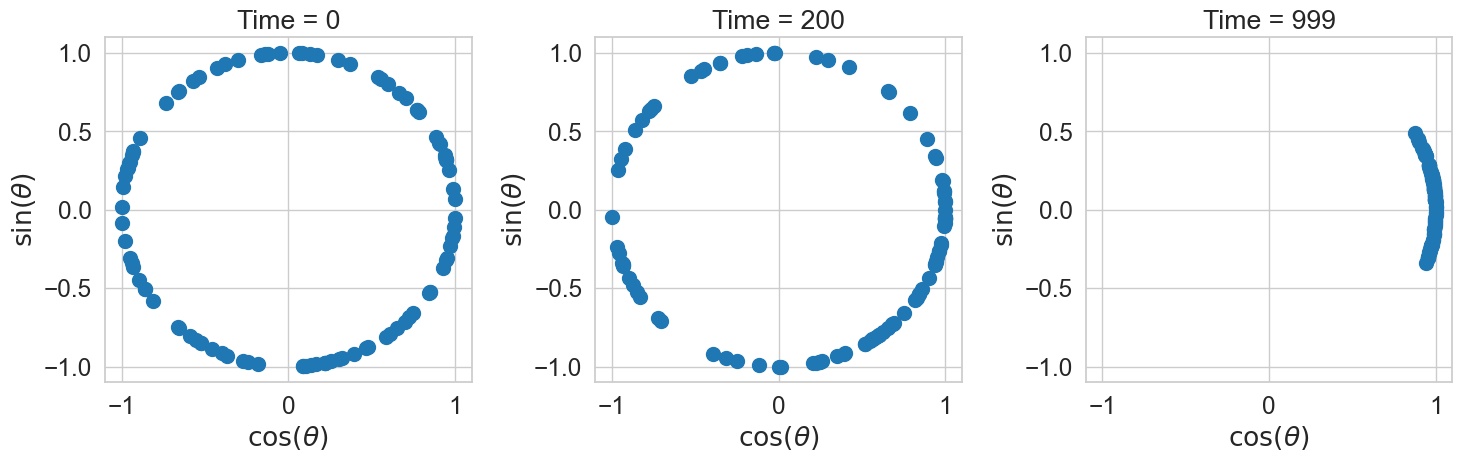

In [72]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })

times = [0, 200, 999]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            'o', 
            markersize=10)
    ax.set_title(f'Time = {time}')
plt.tight_layout()

## Study on the effect of coupling coeficient $K$

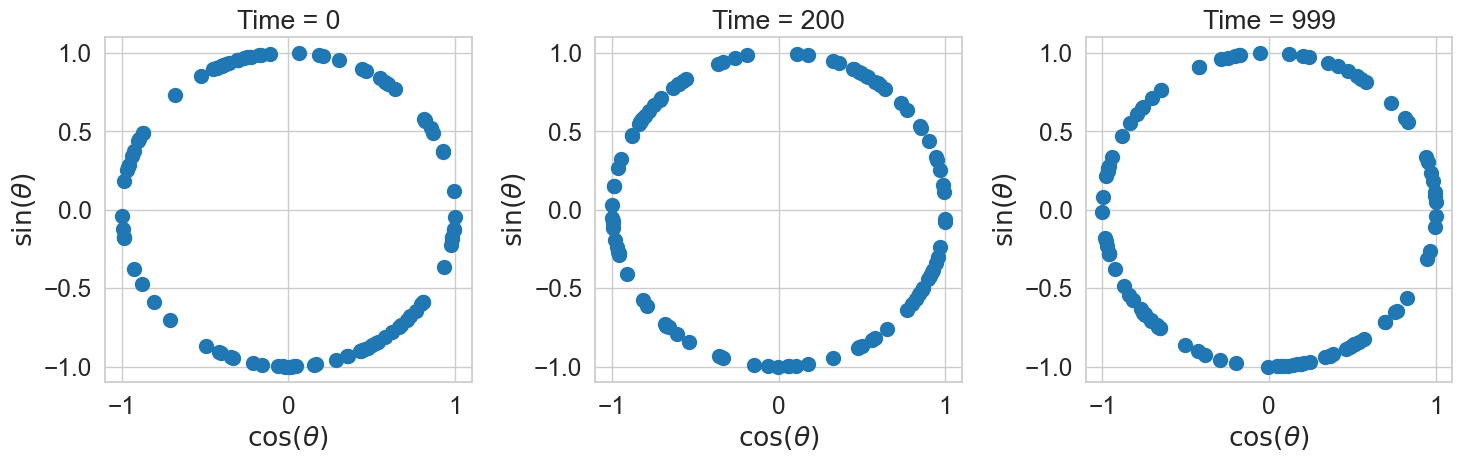

In [51]:
model = Kuramoto(coupling=1, dt=0.01, T=10, n_nodes=len(graph))
act_mat = model.run(adj_mat=graph)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })

times = [0, 200, 999]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            'o', 
            markersize=10)
    ax.set_title(f'Time = {time}')
plt.tight_layout()

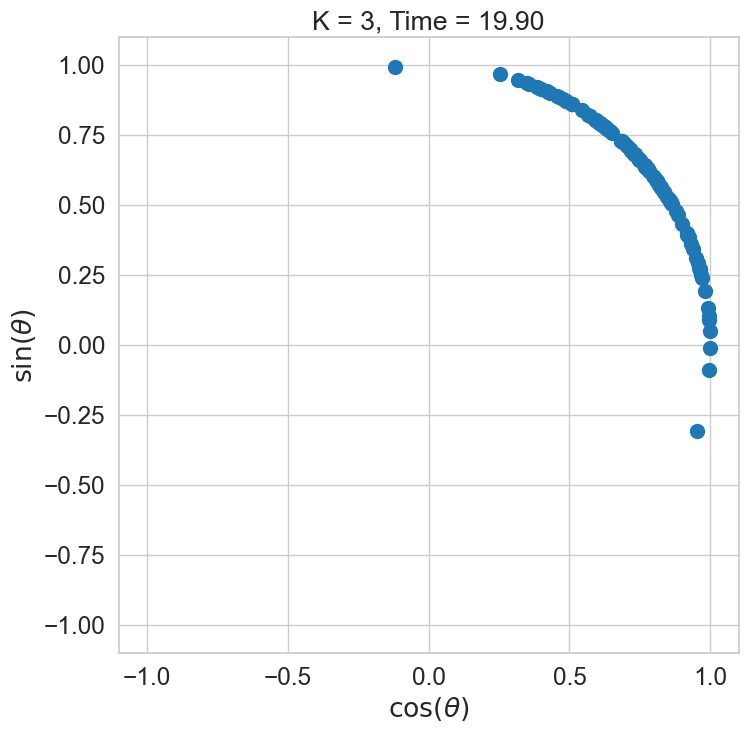

In [76]:
coupling = 3
model = Kuramoto(coupling=coupling, dt=0.01, T=20, n_nodes=len(graph))
act_mat = model.run(adj_mat=graph)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(r'$\cos(\theta)$')
ax.set_ylabel(r'$\sin(\theta)$')

# Time step between frames
frame_step = 10
total_frames = act_mat.shape[1] // frame_step  # より明確な形状指定

# Initial plot (empty plot)
line, = ax.plot([], [], 'o', markersize=10)
title = ax.set_title('')

def update(frame):
    time_idx = frame * frame_step
    
    # Update data
    x_data = np.cos(act_mat[:, time_idx])
    y_data = np.sin(act_mat[:, time_idx])
    
    line.set_data(x_data, y_data)
    title.set_text(f'K = {coupling}, Time = {time_idx * model.dt:.2f}')
    
    return line, title

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=total_frames, 
    interval=50, blit=True, repeat=True
)

# Save animation
ani.save(f'kuramoto_animation_coupling_{coupling}.mp4', writer='ffmpeg')

## Visualisation like the flashing of fireflies

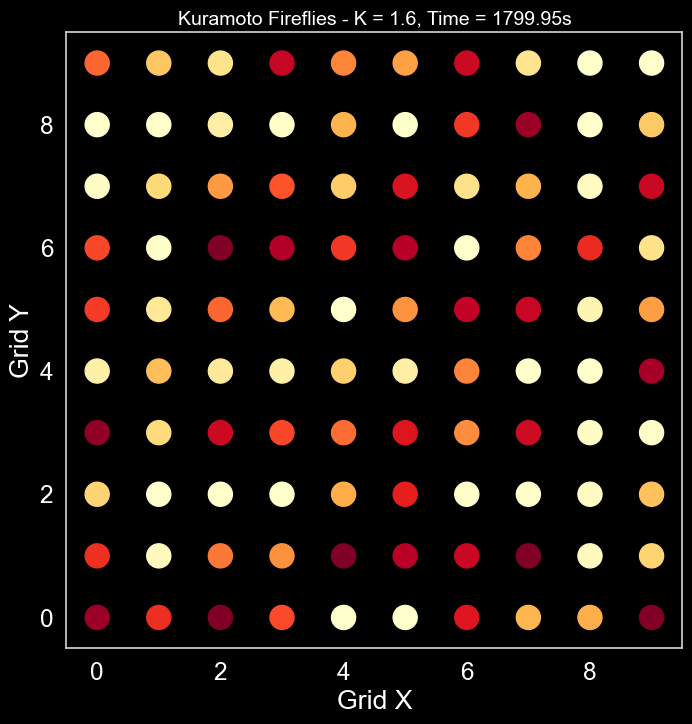

In [106]:
coupling = 1.60
time = 900*2

model = Kuramoto(coupling=coupling, dt=0.01, T=time, n_nodes=len(graph))
act_mat = model.run(adj_mat=graph)

# The size of the grid (100 oscillators arranged in a 10x10 grid)
grid_size = 10
x_grid, y_grid = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
x_coords = x_grid.flatten()
y_coords = y_grid.flatten()

# Firefly-like dark background
fig, ax = plt.subplots(figsize=(10, 8), facecolor='black')
ax.set_facecolor('black')
ax.set_xlim(-0.5, grid_size - 0.5)
ax.set_ylim(-0.5, grid_size - 0.5)
ax.tick_params(colors='white')
ax.set_xlabel('Grid X', color='white')
ax.set_ylabel('Grid Y', color='white')
ax.set_aspect('equal')
ax.grid(False)

# Frame settings
frame_step = 5  # More detailed
total_frames = act_mat.shape[1] // frame_step

# Initial scatter plot (set initial brightness array)
initial_brightness = np.zeros(len(x_coords))
scat = ax.scatter(x_coords, y_coords, s=300, c=initial_brightness, cmap='YlOrRd', vmin=0, vmax=1)
title = ax.set_title(f'Kuramoto Fireflies - K = {coupling}, Time = 0.00s', color='white', fontsize=14)

# Base angular velocity (adjustable)
omega_base = 2.0  # rad/s

def update_firefly(frame):
    time_idx = frame * frame_step
    current_time = time_idx * model.dt
    
    # Phase + base rotation
    phases = act_mat[:, time_idx] + omega_base * current_time
    
    # Brightness change using sin function (flashing effect)
    brightness = (np.sin(phases) + 1) / 2  # Range 0-1
    
    # For a stronger flashing effect, change exponentially
    brightness = brightness ** 2  # More obvious brightness
    
    # Update color array
    scat.set_array(brightness)
    
    # Update title (color is pre-set)
    title.set_text(f'Kuramoto Fireflies - K = {coupling}, Time = {current_time:.2f}s')
    
    return scat, title

# Create animation
ani = animation.FuncAnimation(
    fig, update_firefly, frames=total_frames, 
    interval=50, blit=True, repeat=True
)

# Save animation
ani.save(f'kuramoto_fireflies_rotating_coupling_{coupling}.mp4', writer='ffmpeg')
plt.show()